In [18]:
# Import necessary libraries
import pandas as pd
import re
from datetime import datetime
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


# Load Datasets
fake_df = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/Fake.csv')
true_df = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/True.csv')

# Add labels
fake_df['label'] = 0
true_df['label'] = 1

df = pd.concat([fake_df, true_df], ignore_index=True)

# Remove reuters prefix from text
def remove_reuters_prefix(text):
    return re.sub(r'^[A-Z][A-Z\s\.,\-()]+\(Reuters\)\s*-\s*', '', text, flags=re.IGNORECASE)

# Apply to text column
df['text'] = df['text'].apply(remove_reuters_prefix)

In [19]:
# Function to parse dates with mixed month formats and strip whitespace
def parse_mixed_dates(date_series):
    cleaned_dates = []
    for date_str in date_series:
        date_str = str(date_str).strip()
        try:
            parsed_date = pd.to_datetime(date_str, errors='coerce')
        except Exception:
            parsed_date = pd.NaT
        cleaned_dates.append(parsed_date)
    return pd.Series(cleaned_dates)

df['date'] = parse_mixed_dates(df['date'])

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  #removes punctuation
    text = re.sub(r'\d+', '', text)  #removes numbers
    text = text.lower()  #turns everything to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) #gets rid of stop words
    return text

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/euansmith9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df.value_counts('label')

label
0    23481
1    21417
Name: count, dtype: int64

In [21]:
df.isnull().sum()   

title       0
text        0
subject     0
date       10
label       0
dtype: int64

In [22]:
null_date_rows = df[df['date'].isnull()]
null_date_rows


,title,text,subject,date,label
9358,https://100percentfedup.com/served-roy-moore-v...,httpspercentfedupcomservedroymoorevietnamlette...,politics,NaT,0
15507,https://100percentfedup.com/video-hillary-aske...,httpspercentfedupcomvideohillaryaskedabouttrum...,politics,NaT,0
15508,https://100percentfedup.com/12-yr-old-black-co...,httpspercentfedupcomyroldblackconservativewhos...,politics,NaT,0
15839,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadshillaryst...,politics,NaT,0
15840,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadsentitledjpg,politics,NaT,0
17432,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadshillaryst...,Government News,NaT,0
17433,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadsentitledjpg,Government News,NaT,0
18933,Homepage,vc_rowvc_column width td_block_trending_now li...,left-news,NaT,0
21869,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadshillaryst...,left-news,NaT,0
21870,https://fedup.wpengine.com/wp-content/uploads/...,httpsfedupwpenginecomwpcontentuploadsentitledjpg,left-news,NaT,0


In [23]:
df = df.dropna(subset=['date'])

In [24]:
df.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,0
5,Racist Alabama Cops Brutalize Black Boy While...,number cases cops brutalizing killing people c...,News,2017-12-25,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",donald trump spent good portion day golf club ...,News,2017-12-23,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,wake yet another court decision derailed donal...,News,2017-12-23,0
8,Former CIA Director Slams Trump Over UN Bully...,many people raised alarm regarding fact donald...,News,2017-12-22,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,might thought get break watching people kiss d...,News,2017-12-21,0


In [25]:
df.value_counts('subject')

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6836
left-news           4456
Government News     1568
US_News              783
Middle-east          778
Name: count, dtype: int64

In [26]:
df.to_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/FullyCleanISOT.csv', index=False)

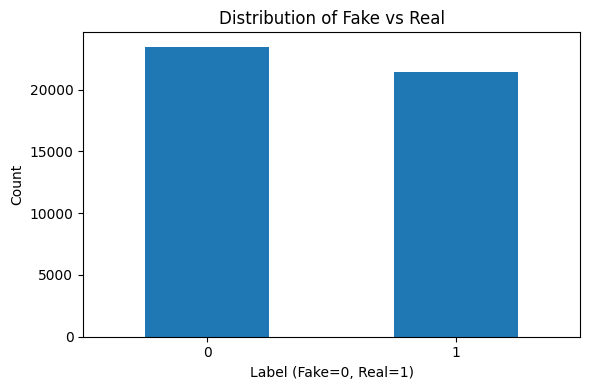

In [27]:
# Count the labels
label_counts = df['label'].value_counts()

# Plot as bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.xlabel('Label (Fake=0, Real=1)')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

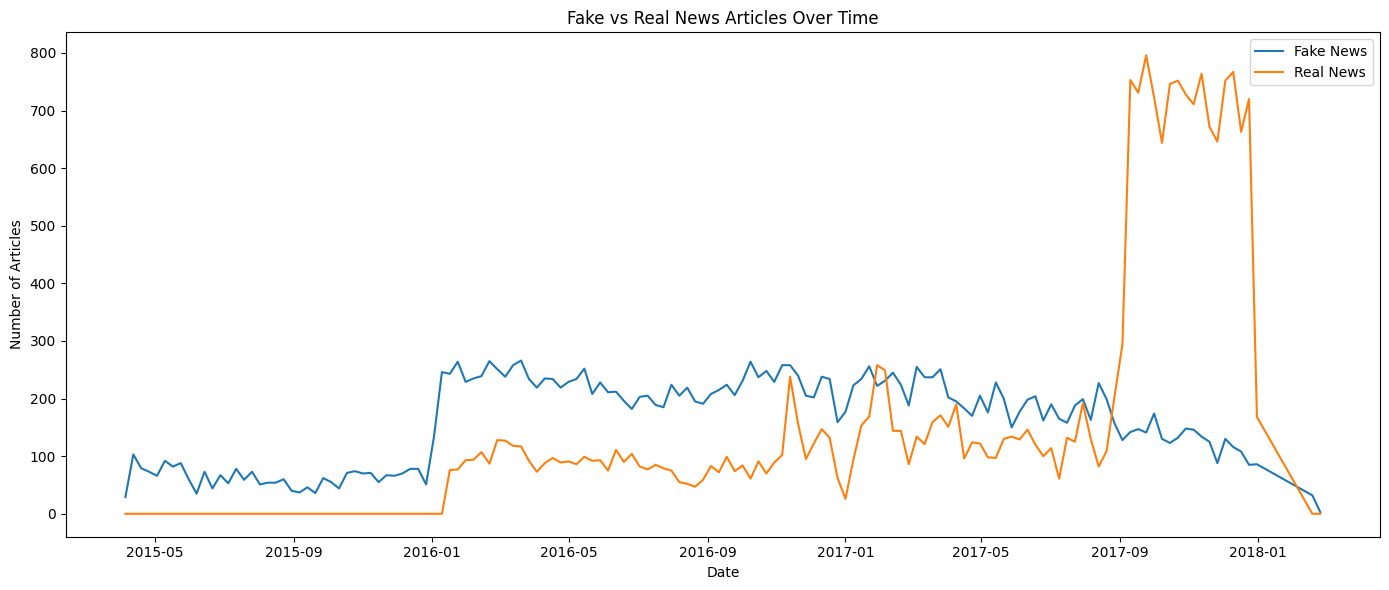

In [28]:
# Group by week and label
time_counts = df.groupby([pd.Grouper(key='date', freq='W'), 'label']).size().unstack(fill_value=0)
time_counts.columns = [0, 1]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(time_counts.index, time_counts[0], label='Fake News')
plt.plot(time_counts.index, time_counts[1], label='Real News')
plt.title('Fake vs Real News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.tight_layout()
plt.show()

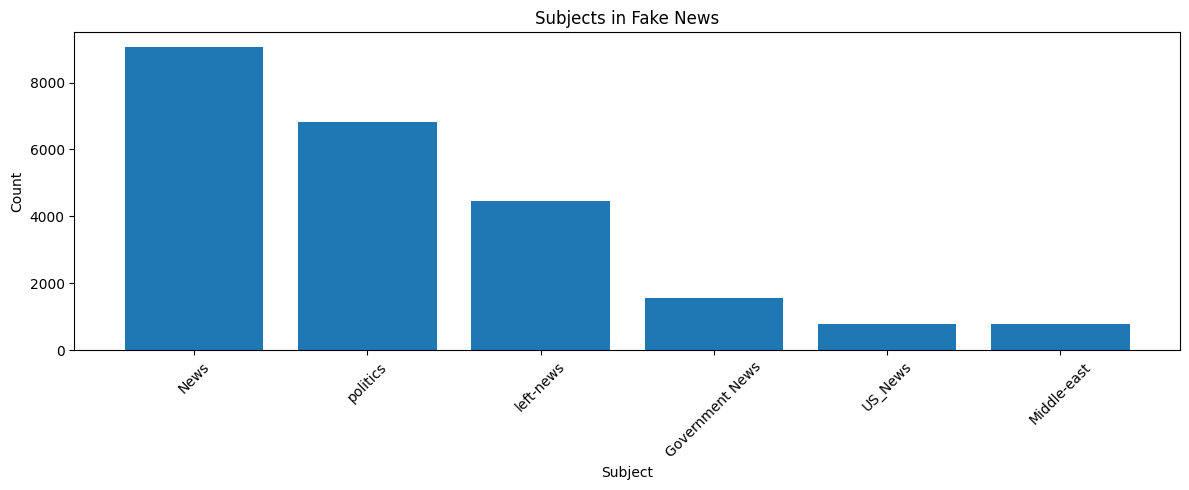

In [29]:
# Split the dataset into fake and real
fake_subject_counts = df[df['label'] == 0]['subject'].value_counts()

# Plot fake news subjects
plt.figure(figsize=(12, 5))
plt.bar(fake_subject_counts.index, fake_subject_counts.values)
plt.title('Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


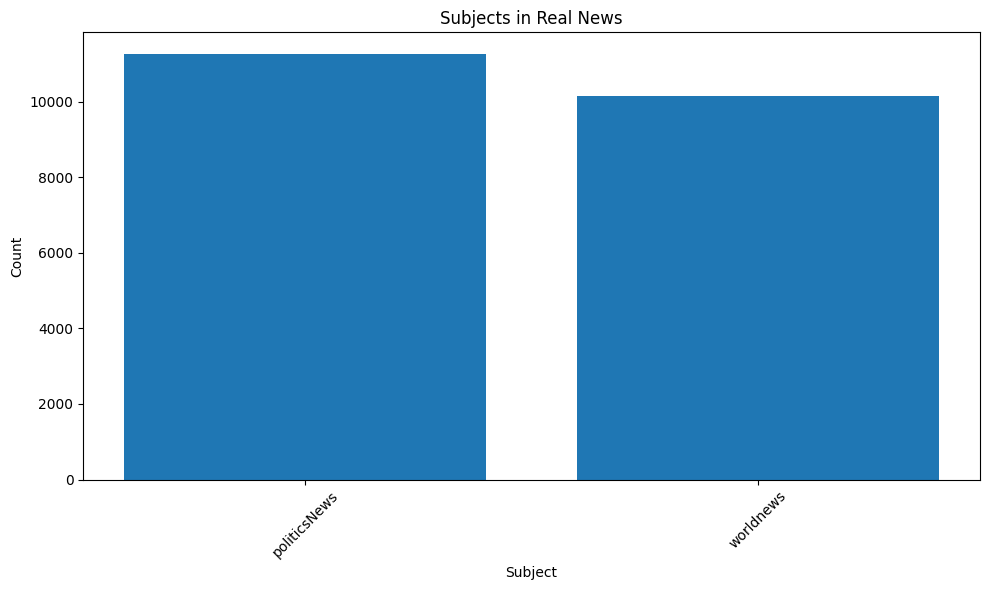

In [30]:
true_subject_counts = df[df['label'] == 1]['subject'].value_counts()

# Plot real news subjects
plt.figure(figsize=(10, 6))
plt.bar(true_subject_counts.index, true_subject_counts.values)
plt.title('Subjects in Real News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

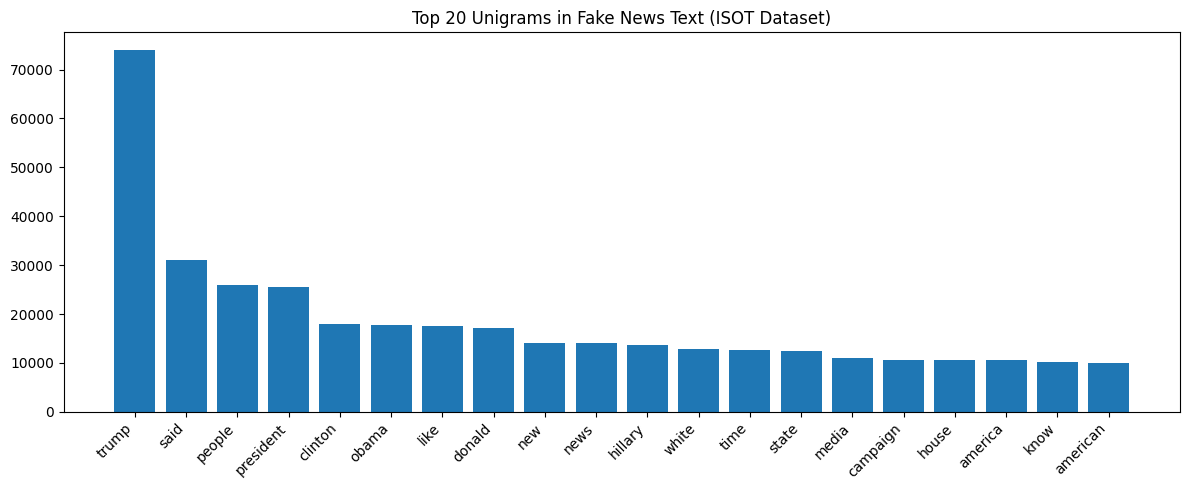

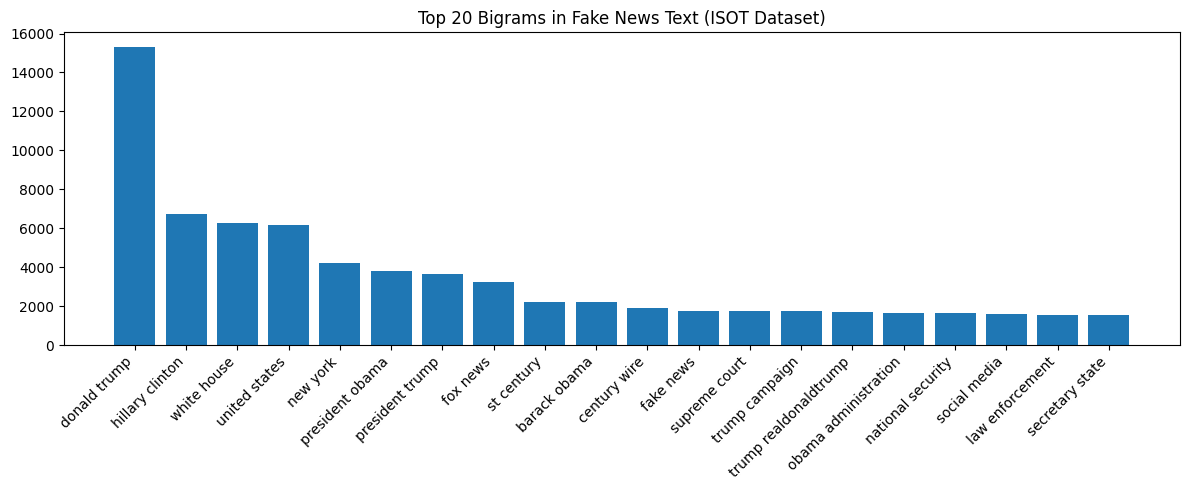

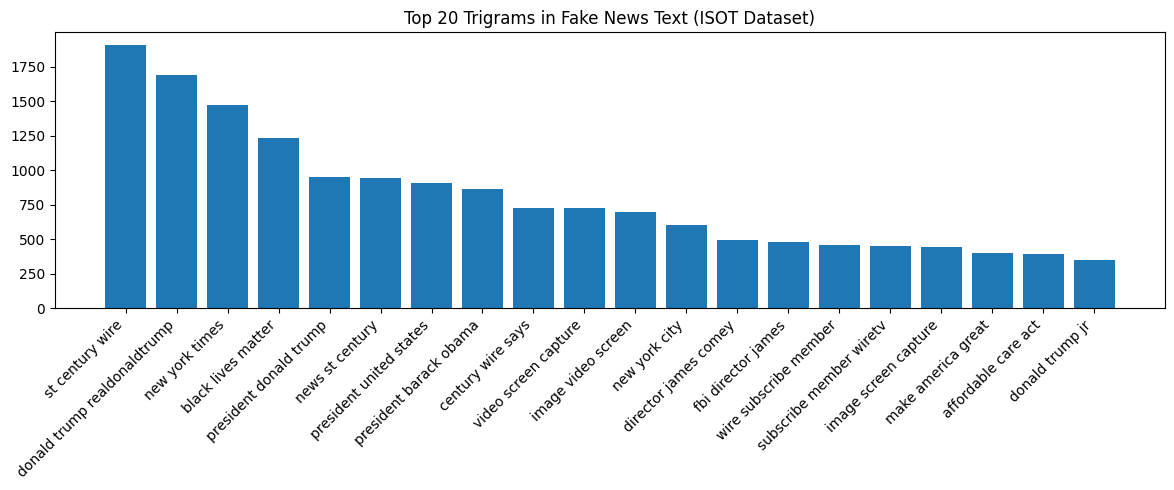

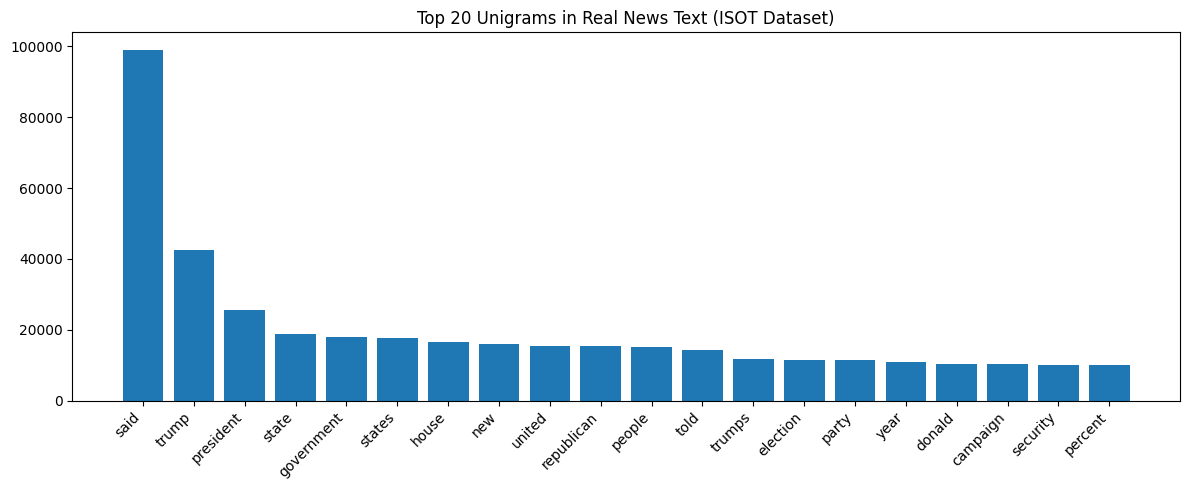

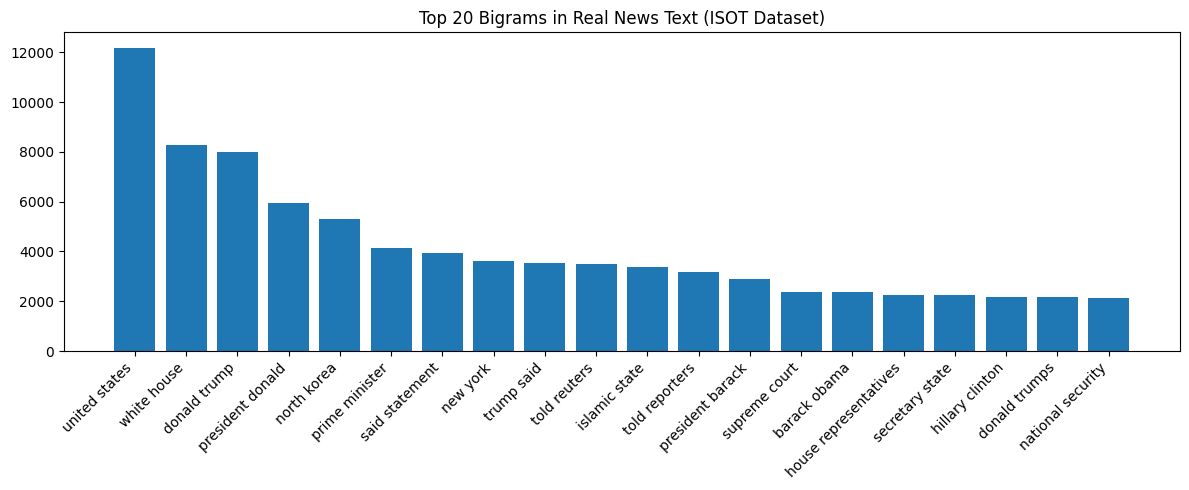

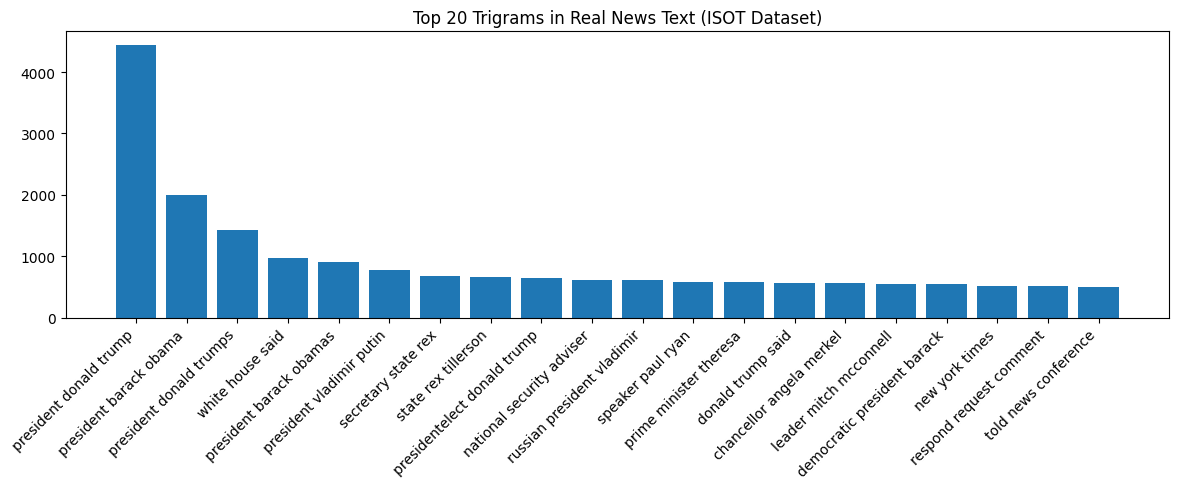

In [31]:
# Full code to extract and plot top 20 unigrams, bigrams, trigrams for fake and real news titles


# Function to extract top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=20):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# Function to plot bar charts
def plot_ngrams(ngrams, title):
    words = [x[0] for x in ngrams]
    counts = [x[1] for x in ngrams]
    plt.figure(figsize=(12, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Sample title data for fake and real news
fake_text = df[df['label'] == 0]['text'].dropna()
real_text = df[df['label'] == 1]['text'].dropna()

# Extract and plot for Fake News
plot_ngrams(get_top_ngrams(fake_text, (1, 1), 20), "Top 20 Unigrams in Fake News Text (ISOT Dataset)")
plot_ngrams(get_top_ngrams(fake_text, (2, 2), 20), "Top 20 Bigrams in Fake News Text (ISOT Dataset)")
plot_ngrams(get_top_ngrams(fake_text, (3, 3), 20), "Top 20 Trigrams in Fake News Text (ISOT Dataset)")

# Extract and plot for Real News
plot_ngrams(get_top_ngrams(real_text, (1, 1), 20), "Top 20 Unigrams in Real News Text (ISOT Dataset)")
plot_ngrams(get_top_ngrams(real_text, (2, 2), 20), "Top 20 Bigrams in Real News Text (ISOT Dataset)")
plot_ngrams(get_top_ngrams(real_text, (3, 3), 20), "Top 20 Trigrams in Real News Text (ISOT Dataset)")



/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_37970/1988940718.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


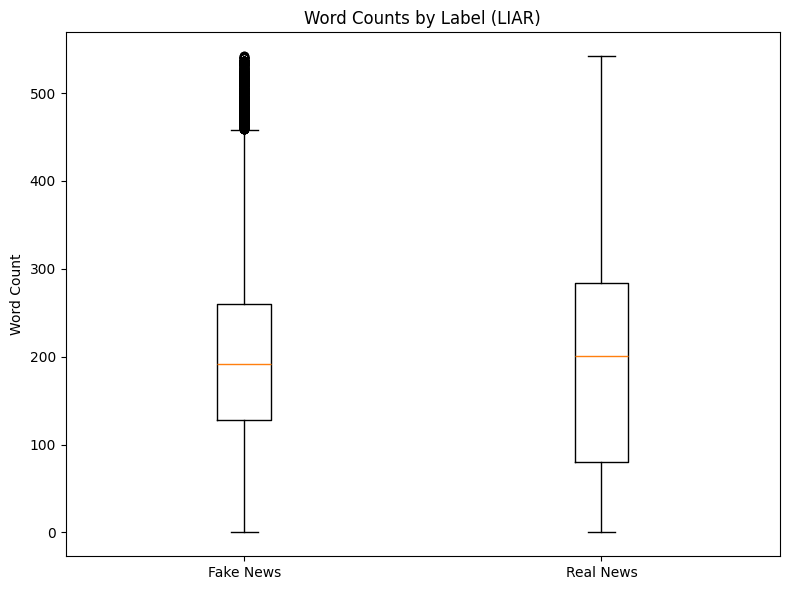

In [ ]:
# Add a new column for word count in the 'statement' column
df['word_count'] = df['text'].fillna('').apply(lambda x: len(x.split()))

# Remove outliers using the IQR method for word_count
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on the calculated bounds
df_no_outliers = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]

# Plot word counts by label using boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [df_no_outliers[df_no_outliers['label'] == 0]['word_count'],
     df_no_outliers[df_no_outliers['label'] == 1]['word_count']],
    labels=['Fake News', 'Real News']
)
plt.title('Word Counts by Label (ISOT)')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

In [ ]:
# Split word counts by class
fake_counts = df[df['label'] == 0]['word_count']
real_counts = df[df['label'] == 1]['word_count']

def median_and_siqr(series):
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    siqr = (q3 - q1) / 2  # semi-interquartile range
    return median, siqr

fake_median, fake_siqr = median_and_siqr(fake_counts)
real_median, real_siqr = median_and_siqr(real_counts)

print(f"Fake News -> Median: {fake_median}, SIQR: {fake_siqr}")
print(f"Real News -> Median: {real_median}, SIQR: {real_siqr}")

Fake News -> Median: 196.0, SIQR: 70.5
Real News -> Median: 209.0, SIQR: 109.5


In [ ]:
# Load the datasets
fake_df = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/Fake.csv')
true_df = pd.read_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/True.csv')

# Add labels
fake_df['label'] = 0
true_df['label'] = 1

df = pd.concat([fake_df, true_df], ignore_index=True)

def remove_reuters_prefix(text):
    return re.sub(r'^[A-Z][A-Z\s\.,\-()]+\(Reuters\)\s*-\s*', '', text, flags=re.IGNORECASE)

# Apply to text column
df['text'] = df['text'].apply(remove_reuters_prefix)

df = df.drop(index=[9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870])

df.to_csv('/Users/euansmith9/Library/CloudStorage/OneDrive-UniversityofStrathclyde/Fifth Year/MS983/Datasets/ISOT/Cleaned_Data.csv', index=False)